In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Flatten, 
                                     Dense, 
                                     Dropout)
from tensorflow.keras.optimizers import Adam


### **Task 1 - Implement Dropout in a Neural Network**
Goal: Train a deep learning model trained on a set of image dataset with dropout and analyze the effect on accuracy and overfitting.

**Loading and Preprocessing the Data**

In [7]:
train_dir = r"C:\Users\CompUser\Documents\GitHub\iCog-Task\sparsity_task\seg_train\seg_train"
test_dir = r"C:\Users\CompUser\Documents\GitHub\iCog-Task\sparsity_task\seg_test\seg_test"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1.9/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


**Building the Neural Network**

Here we have 2 models with and without a Dropout layer.

In [8]:
DROPOUT_RATE = 0.4

# Model definitions
model_with_dropout = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Dropout(DROPOUT_RATE),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Dropout(DROPOUT_RATE),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Dropout(DROPOUT_RATE),

    Flatten(),

    Dense(128, activation="relu"),
    Dropout(DROPOUT_RATE),
    Dense(64, activation="relu"),
    Dense(train_generator.num_classes, activation="softmax")
])

model_without_dropout = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(train_generator.num_classes, activation="softmax")
])

# Model compilation
model_with_dropout.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_without_dropout.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


**Training the Model**

In [19]:
EPOCHS = 30

model_history_dropout = model_with_dropout.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

model_history = model_without_dropout.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 449ms/step - accuracy: 0.7713 - loss: 0.6446 - val_accuracy: 0.6640 - val_loss: 0.8649
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 355ms/step - accuracy: 0.7311 - loss: 0.7025 - val_accuracy: 0.6537 - val_loss: 0.8743
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 36s 386ms/step - accuracy: 0.7519 - loss: 0.6575 - val_accuracy: 0.6507 - val_loss: 0.8915
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 35s 367ms/step - accuracy: 0.7856 - loss: 0.5777 - val_accuracy: 0.6617 - val_loss: 0.8767
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 36s 382ms/step - accuracy: 0.7713 - loss: 0.6320 - val_accuracy: 0.5583 - val_loss: 1.1962
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 34s 366ms/step - accuracy: 0.7589 - loss: 0.6229 - val_accuracy: 0.6670 - val_loss: 0.8543
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 388ms/step - accuracy: 0.7768 - loss: 0.6433 - val_accuracy: 0.6457 - val_loss: 0.9401
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 36s 384ms/step - accuracy: 0.7826 - loss: 0.5950 - val_accu

**Model evaluation**

Training is complete, and now the performance of the models is evaluated.
Accuracy and overfitting measurment is used for this evaluation.

In [20]:
# test accuracy of each models
test_loss, test_acc = model_with_dropout.evaluate(test_generator)
print(f"Test accuracy (with droput): {test_acc*100:.2f}%")

test_loss, test_acc = model_without_dropout.evaluate(test_generator)
print(f"Test accuracy (without droput): {test_acc*100:.2f}%")

# overfitting measurment: we check the generalization gap for this
# we generally expect a high gap for the model without dropout
# and a lower gap for the model with a dropout
train_acc = model_history.history["accuracy"][-1]
val_acc = model_history.history["val_accuracy"][-1]
print(f"Generalization Gap (with dropout): {100*(train_acc-val_acc):.4f}")

train_acc = model_history_dropout.history["accuracy"][-1]
val_acc = model_history_dropout.history["val_accuracy"][-1]
print(f"Generalization Gap (without dropout): {100*(train_acc-val_acc):.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step - accuracy: 0.5878 - loss: 1.2540
Test accuracy (with droput): 58.90%
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.7009 - loss: 0.9003
Test accuracy (without droput): 70.63%
Generalization Gap (with dropout): 9.3667
Generalization Gap (without dropout): 20.2000


**Now we make predictions!**

In [21]:
from tensorflow.keras.preprocessing import image

class_labels = list(train_generator.class_indices.keys())

def predict(img_path: str):
    """
    This method takes an image, preprocesses it, 
    and uses a trained model to predict its class label. 
    It then displays the image with the predicted label as the title.
    
    Parameters:
    img_paths (str): image file paths.
    """
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model_with_dropout.predict(img_array)
    predicted_class = np.argmax(predictions)
    predicted_label = class_labels[predicted_class]

    plt.figure(figsize=(5,5))
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label}") 
    plt.show()


Here we randomly sample out images for the prediction pool and call the above method on each of them.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


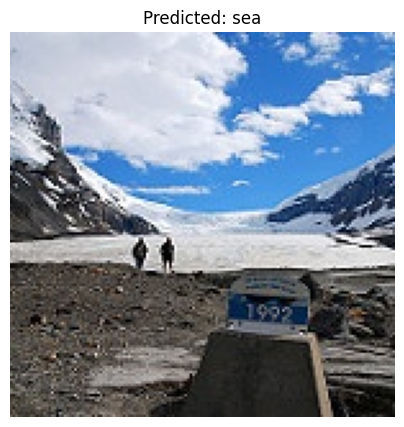

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


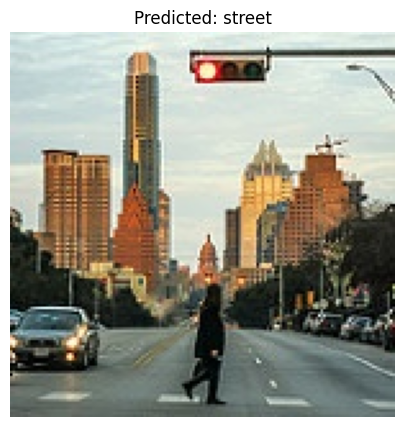

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


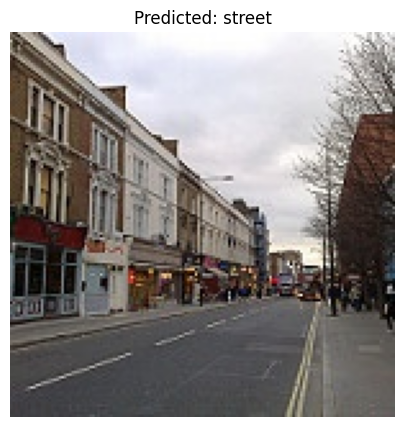

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


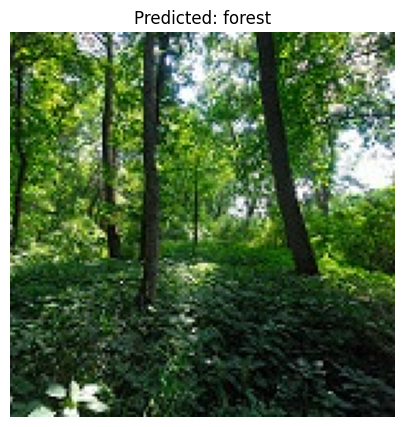

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


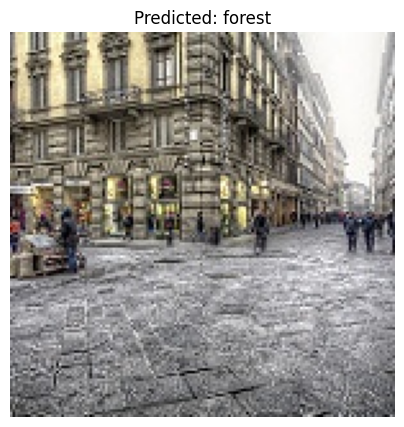

In [26]:
import random

SAMPLE = 5

prediction_dir = r"C:\Users\CompUser\Documents\GitHub\iCog-Task\sparsity_task\seg_pred\seg_pred"

images_for_prediction = [os.path.join(prediction_dir, file) for file in os.listdir(prediction_dir)]
for img in random.choices(population=images_for_prediction, k=SAMPLE):
    predict(img)

### **Task 2 - Implement Dictionary Learning** 
Goal: Use dictionary learning to represent images with sparse components.

**Loading our custom dataset**

In [27]:
# dictionary learning
from PIL import Image
from sklearn.decomposition import DictionaryLearning
from skimage.color import rgb2gray

image_dir = r"C:\Users\CompUser\Documents\GitHub\iCog-Task\sparsity_task\seg_pred\seg_pred"
image_files = os.listdir(image_dir)

image_data = []

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path).convert("RGB")
    img = img.resize(IMG_SIZE)
    img_array = np.array(img)

    img_gray = rgb2gray(img_array)
    image_data.append(img_gray.flatten())

X = np.array(image_data)

**Proceeding  to the dictionary learning**

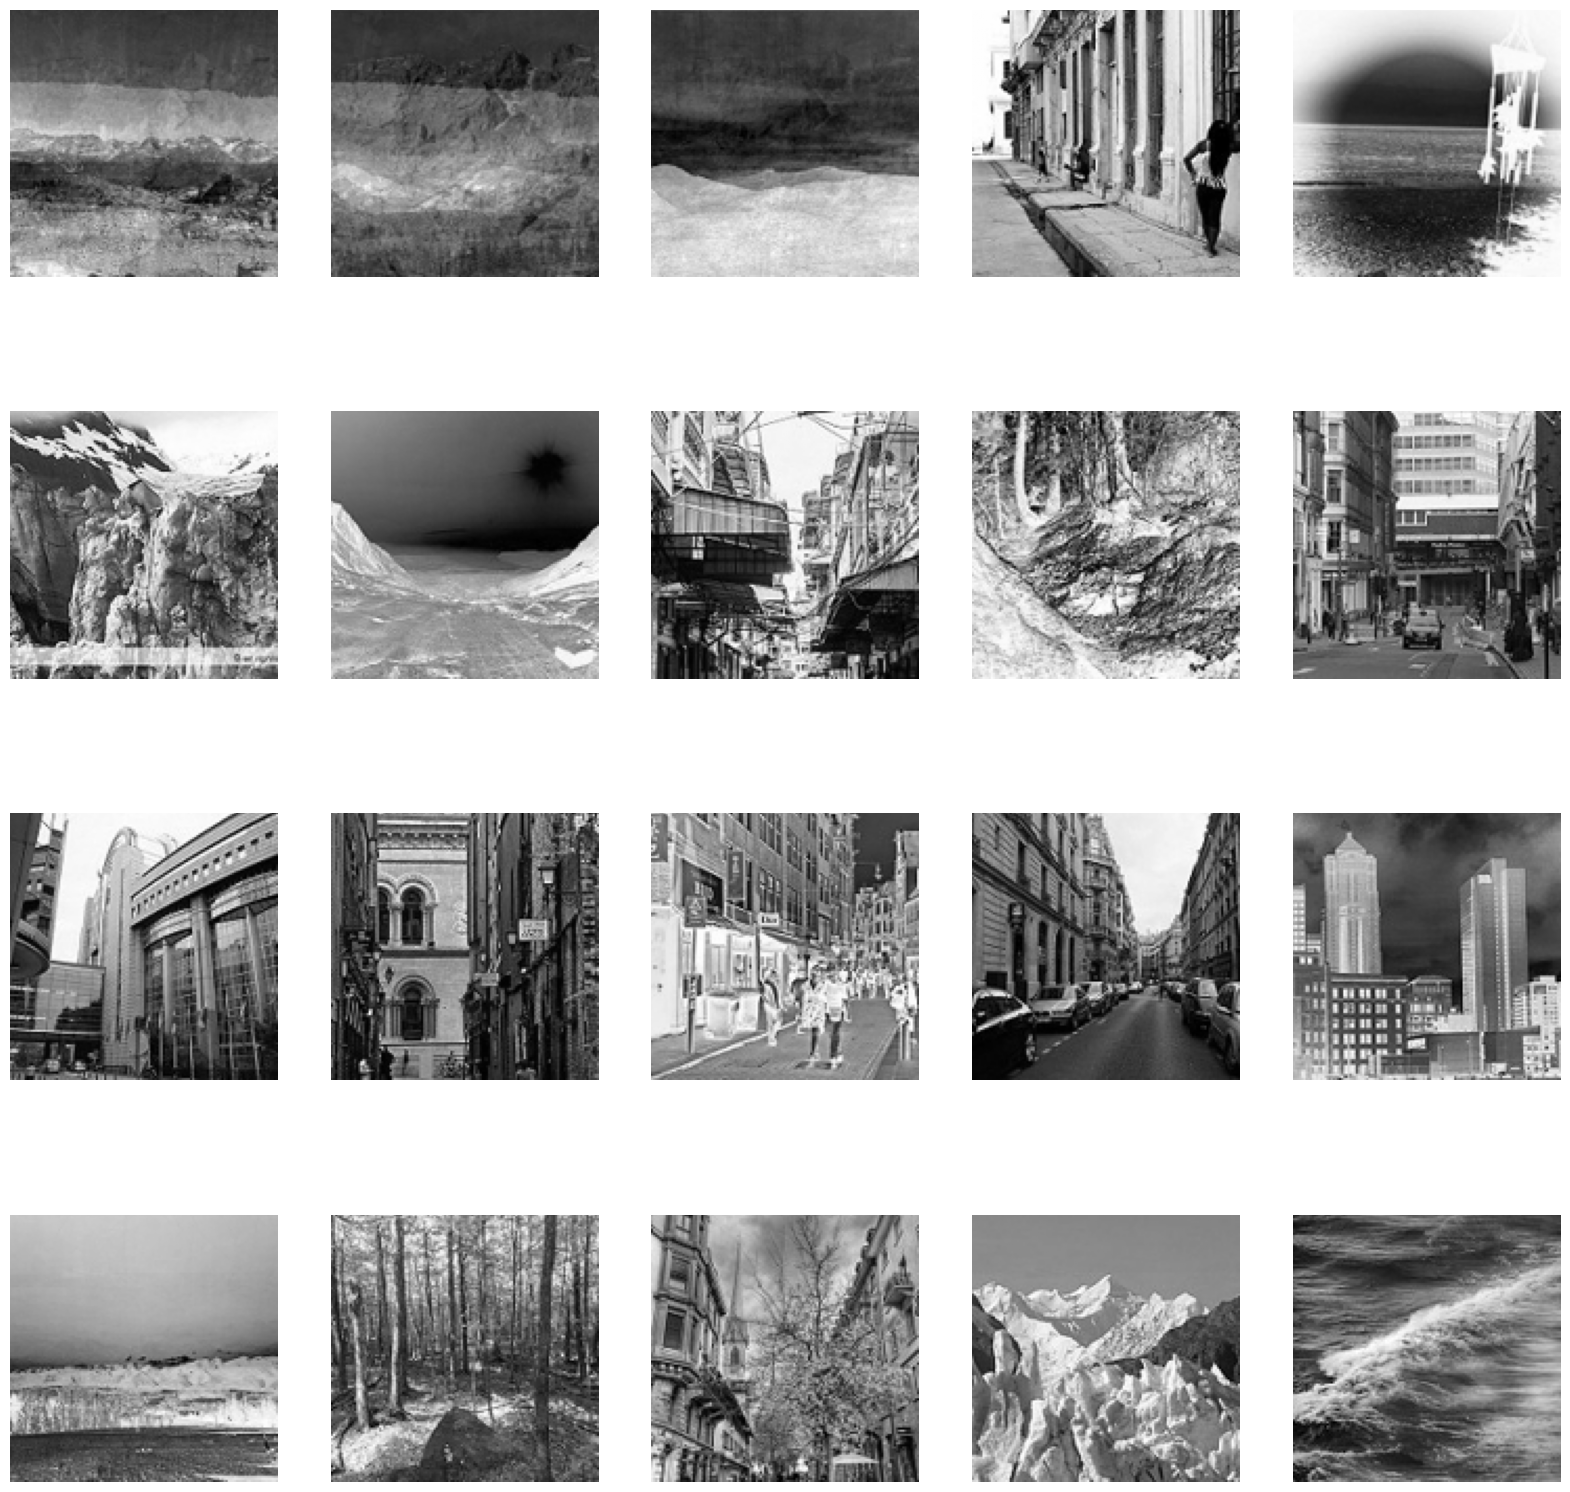

In [14]:
ATOMS = 30 # atoms size for the dictionary to learn

dl = DictionaryLearning(n_components=ATOMS, transform_algorithm="lasso_lars", transform_alpha=0.1)

# the size of the data set was huge and was taking a huge time to compute
# so i ended up only using the first 40 to make things easier
dl.fit(X[:40]) 

# reshaping the atoms back into 2D for visualization
dictionary_atoms = dl.components_.reshape((ATOMS, IMG_SIZE[0], IMG_SIZE[1]))

# visualizing the learned dictionary atoms
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(dictionary_atoms[i], cmap='gray')
    ax.axis('off')

plt.show()

**Representing and Image using the Learned Dictionary**

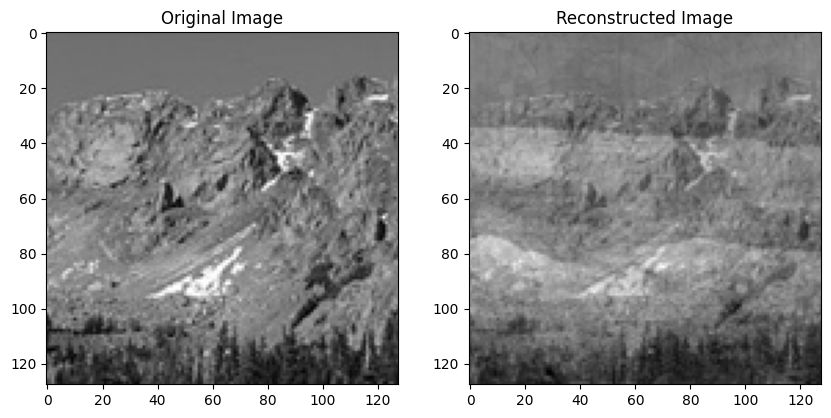

In [32]:
img_idx = 4
img_to_represent = X[img_idx].reshape(IMG_SIZE[0], IMG_SIZE[1])

# applying the sparse code to represent the image using the learned dictionary
sparse_code = dl.transform(X[img_idx].reshape(1, -1))
reconstructed_image = np.dot(sparse_code, dl.components_)
reconstructed_image = reconstructed_image.reshape(IMG_SIZE[0], IMG_SIZE[1])

figure, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_to_represent, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(reconstructed_image, cmap="grey")
ax[1].set_title("Reconstructed Image")
plt.show()

#### **Measuring the reconstruction error (MSE) to seee how well the dictionary is representing the image**
If the dictionary learning process worked well, MSE should be close to 0. On the other hand, a higher value of this indicates a significant loss of information.
Fortunately, the value of the MSE for this dictionary is extremely low!

In [34]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(img_to_represent, reconstructed_image.reshape(IMG_SIZE[0], IMG_SIZE[1]))
print(f"Reconstruction Error (Mean Squared Error): {mse}")

Reconstruction Error (Mean Squared Error): 0.006486706904530163


**Sparsity Analysis**

In [36]:
# sparsity analysis
sparsity = np.count_nonzero(sparse_code) / sparse_code.size
print(f"Sparsity: {sparsity:.4f}")

Sparsity: 0.6667
